## Практическое занятие 8. Кейс по "Титанику"

<div class="alert alert-block alert-success">
</b> ФИО, группа: </b> Безгребельная Алла, УСБО-01-23
</div>

### Часть 1. Предварительный анализ

<div class="alert alert-block alert-warning">
<b> 1.  Импортируйте необходимые библиотеки и установите датасет для анализа: </b>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<div class="alert alert-block alert-warning">
<b> 2. Выведите общую информацию о датафрейме - код должен отвечать на вопросы:
    
* Сколько строк в датасете?
* Имеются ли пропущенные значения в датасете?
* Что представляет из себя структура данных? Напишите своими словами, что содержит в себе каждый столбец в датафрейме.
</b>
</div>

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Вывод по результатам анализа (используйте Markdown, чтобы отмечать ключевые моменты в тексте, включая __подчеркивание__ , _курсив_, списки (нумерованные, ненумерованные):

In [321]:
titanic['alone'].unique()

array([False,  True])

1. Сколько строк в датасете?
   891
2. Имеются ли пропущенные значения в датасете?
   Да, в столбцах age, embarked, deck, embark_town имеются пропущенные значения.
3. Что представляет из себя структура данных? Напишите своими словами, что содержит в себе каждый столбец в датафрейме.

survived -- Выжил ли пассажир

pclass	 -- Класс билета

sex	     -- Пол

age	     -- Возраст в годах

sibsp	 -- Число братьев/сестер или супругов пассажира на борту Титаника

parch	 -- Число родителей и детей пассажира на борту Титаника

fare	 -- Стоимость проезда для пассажиров

embarked -- Порт посадки, обозначенный одной буквой(C = Шербур, Q = Квинстаун, S = Саутгемптон)

class    -- Класс каюты

who      -- Взрослый (с уточнением мужчина/женщина) или ребенок

adult_male -- Является ли пассажир взрослым 

deck     -- Название палубы

embark_town -- Полное название города посадки

alive -- Жив ли пассажир сейчас

alone -- Пассажир ехал один (True - да, False - нет)


<div class="alert alert-block alert-warning">
<b> 3.  Сколько уникальных портов посадки есть в данных? </b>
</div>

In [38]:
titanic.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<div class="alert alert-block alert-warning">
<b> 4. Сколько пассажиров выжило, а сколько погибло? Кого погибло больше - мужчин или женщин? </b>
</div>

In [67]:
pd.pivot_table(titanic, values = 'survived', index = titanic['survived'], columns = titanic['sex'], aggfunc = 'count')

sex,female,male
survived,,
0,81,468
1,233,109


<div class="alert alert-block alert-warning">
<b> 5. Сколько пассажиров было в каждом классе?</b>
</div>

In [71]:
titanic.pclass.groupby(titanic.pclass).count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

<div class="alert alert-block alert-warning">
<b> 6. Составьте сводную таблицу, отражающую количество выживших по полу и возрасту. </b>
</div>

In [101]:
pd.pivot_table(titanic, values = 'survived', index = titanic['sex'], columns = titanic['age'], aggfunc = 'sum', fill_value = 0)

age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
sex,,,,,,,,,,,,,,,,,,,,,
female,0,0,2,0,0,2,2,1,5,4,...,1,2,0,0,0,0,0,0,0,0
male,1,1,0,2,1,3,1,4,2,0,...,1,0,0,0,0,0,0,0,0,1


<div class="alert alert-block alert-warning">
<b> 7. У скольких пассажиров были братья/сёстры или супруги на борту? Сколько эти пассажиры суммарно заплатили за билет? </b>
</div>

In [135]:
titanic[titanic.sibsp != 0].sibsp.groupby(titanic.sibsp).count()

sibsp
1    209
2     28
3     16
4     18
5      5
8      7
Name: sibsp, dtype: int64

In [141]:
titanic[titanic.sibsp != 0].fare.groupby(titanic.sibsp).sum()

sibsp
1    9226.8004
2    1449.1041
3    1102.5418
4     573.4000
5     234.5000
8     486.8500
Name: fare, dtype: float64

<div class="alert alert-block alert-warning">
<b> 8. Сколько пассажиров младше 18 лет ? </b>
</div>

In [147]:
len(titanic[titanic.age < 18])

113

<div class="alert alert-block alert-warning">
<b> 9. Кто купил самый дорогой билет? Выведите его пол, возраст и класс. </b>
</div>

In [151]:
titanic[titanic.fare == max(titanic.fare)][['sex', 'age', 'class']]

,sex,age,class
258,female,35.0,First
679,male,36.0,First
737,male,35.0,First


<div class="alert alert-block alert-warning">
<b> 10. Какой процент мужчин и женщин выжил? </b>
</div>

In [171]:
round(titanic.survived.groupby(titanic.sex).sum()/titanic.survived.groupby(titanic.sex).count()*100, 2)

sex
female    74.20
male      18.89
Name: survived, dtype: float64

<div class="alert alert-block alert-warning">
<b> 11. Какой возраст встречается чаще всего (мода)? </b>
</div>

In [175]:
titanic.age.mode()

0    24.0
Name: age, dtype: float64

<div class="alert alert-block alert-warning">
<b> 12. Какое максимальное количество родственников (sibsp + parch) было у одного пассажира? </b>
</div>

In [189]:
max(titanic.sibsp + titanic.parch)

10

<div class="alert alert-block alert-warning">
<b> 13. Сколько человек сейчас живы исходя из данных? </b>
</div>

In [205]:
len(titanic[titanic.alive=='yes'])

342

### Часть 2. Визуализация данных с помощью Seaborn

<div class="alert alert-block alert-warning">
<b> 14. Постройте гистограмму, отображающую распределение возрастов среди пассажиров </b>
</div>

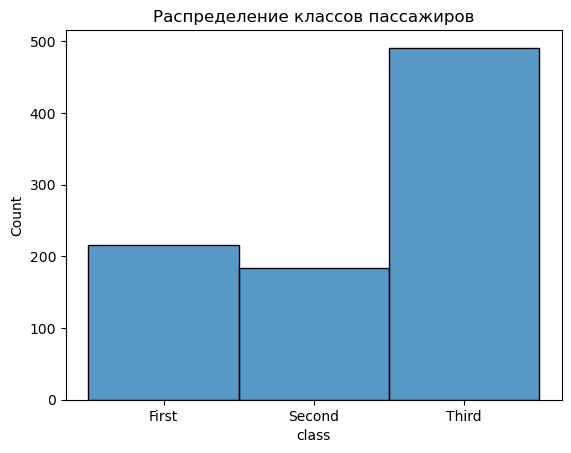

In [207]:
#пример гистограммы по классам:
sns.histplot(data=titanic, x='class', bins=20)
plt.title("Распределение классов пассажиров")
plt.show()

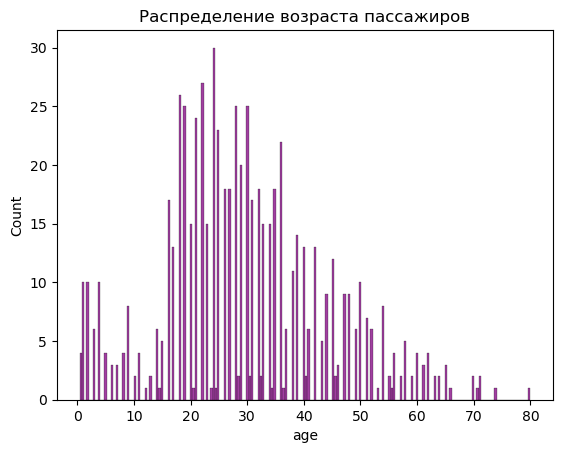

In [219]:
# ваш код (попробуйте поменять цвет):
sns.histplot(data=titanic, x='age', bins=200, color = 'purple')
plt.title("Распределение возраста пассажиров")
plt.show()

<div class="alert alert-block alert-warning">
<b> 15. Постройте круговую диаграмму, отображающую состав пассажиров по классу обслуживания. </b>
</div>

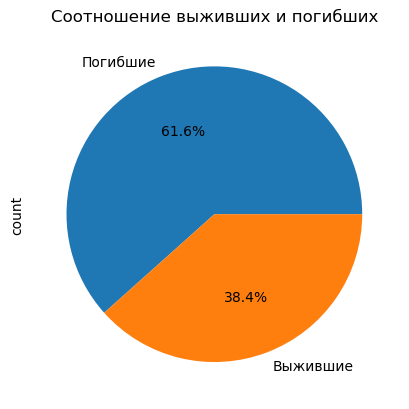

In [221]:
#пример гистограммы по погибшим и выжившим:
titanic['survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Погибшие', 'Выжившие'])
plt.title("Соотношение выживших и погибших")
plt.show()

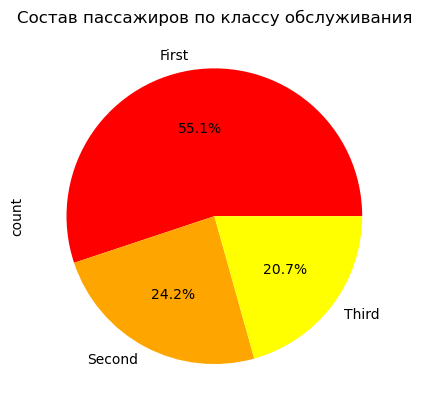

In [239]:
# ваш код (измените настройки):
titanic['class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['First', 'Second', 'Third'], colors = ['red', 'orange', 'yellow'])
plt.title("Состав пассажиров по классу обслуживания")
plt.show()

<div class="alert alert-block alert-warning">
<b> 16. Постройте ящичную диаграмму, отображающую распределение пассажиров по цене билета. </b>
</div>

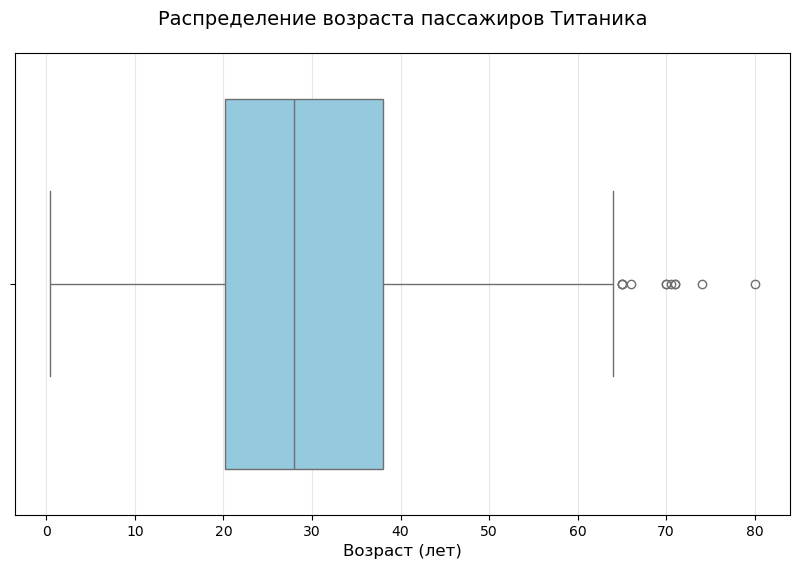

In [241]:
#пример по возрасту
plt.figure(figsize=(10, 6))

sns.boxplot(x=titanic['age'], color='skyblue')

plt.title('Распределение возраста пассажиров Титаника', fontsize=14, pad=20)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

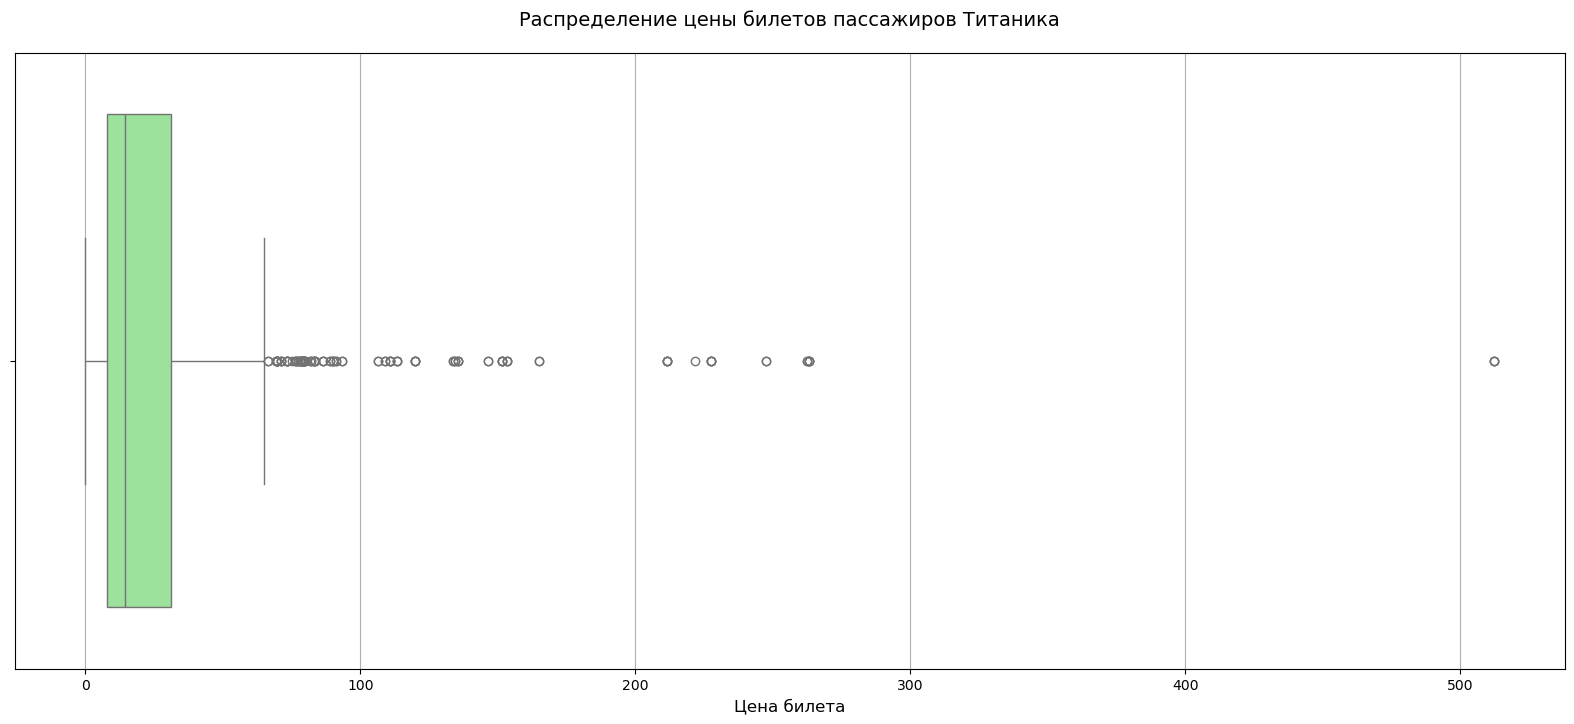

In [287]:
# ваш код (измените настройки):
plt.figure(figsize=(20, 8))

sns.boxplot(x=titanic['fare'], color='lightgreen')

plt.title('Распределение цены билетов пассажиров Титаника', fontsize=14, pad=20)
plt.xlabel('Цена билета', fontsize=12)
plt.grid(axis='x', alpha=1)

plt.show()

<div class="alert alert-block alert-warning">
<b> 17. Постройте тепловую диаграмму корреляций между числовыми переменными </b>
</div>

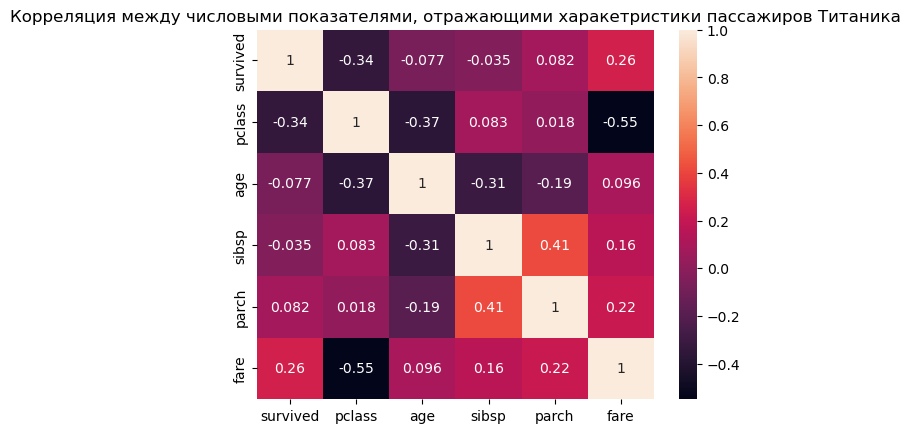

In [301]:
sns.heatmap(titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr(), annot=True) #перечислите переменные в скобках
plt.title("Корреляция между числовыми показателями, отражающими харакетристики пассажиров Титаника") #дайте название графику
plt.show()

### Часть 3. Интерпретация результатов

<div class="alert alert-block alert-warning">
<b> 18. На основе уже построенных и построенных вами графиков и предыдущих вычислений сделайте комплексные выводы по результатам анализа. </b>
</div>

__Ваши выводы__:

- Самым пассажироемким классом является третий класс.
  
- Самым частым возрастом пассажиров является -- 24 года.

- Поигбших больше, чем выживших на 23,2%.
  
  

### Часть 4. Скрипты для презентации

In [543]:
pd.pivot_table(titanic, values = 'survived', index = titanic['sex'], 
               columns = titanic['survived'], aggfunc = 'count', fill_value = 0)


survived,0,1
sex,,
female,81,233
male,468,109


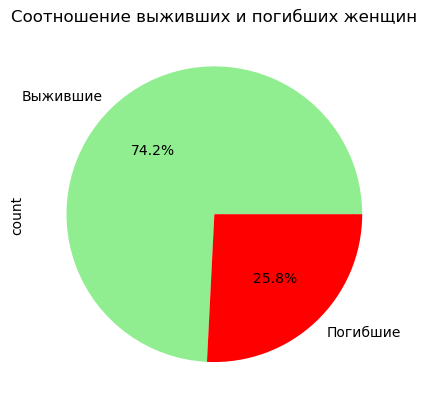

In [567]:
titanic[titanic.sex == 'female']['survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Выжившие', 'Погибшие'], colors = ['lightgreen', 'red'])
plt.title("Соотношение выживших и погибших женщин")
plt.show()

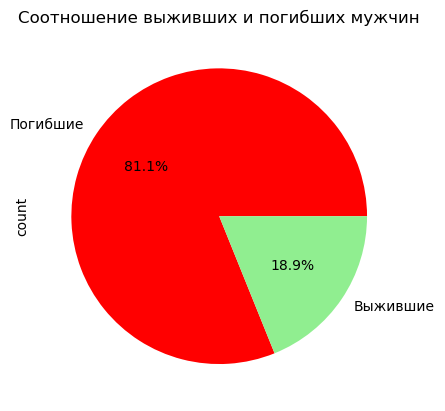

In [569]:
titanic[titanic.sex == 'male']['survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Погибшие', 'Выжившие'], colors = ['red', 'lightgreen'])
plt.title("Соотношение выживших и погибших мужчин")
plt.show()

In [923]:
pd.pivot_table(titanic, values = 'survived', index = titanic['pclass'], 
               columns = titanic['survived'], aggfunc = 'count', fill_value = 0)


survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


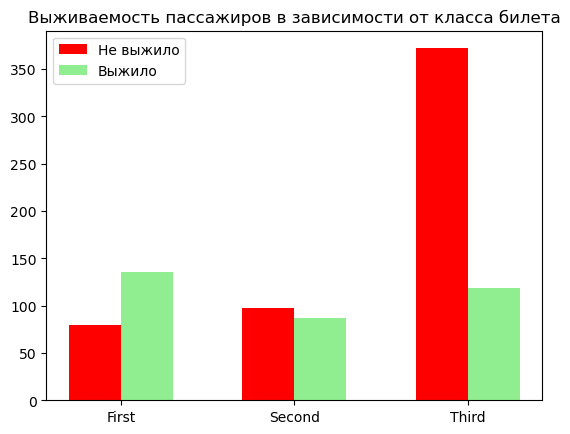

In [629]:
cat_par = ['First', 'Second', 'Third']

zero = [80, 97, 372] 
one = [136, 87, 119]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, zero, width, label='Не выжило', color = 'red')
rects2 = ax.bar(x + width/2, one, width, label='Выжило', color = 'lightgreen')

ax.set_title('Выживаемость пассажиров в зависимости от класса билета')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

In [665]:
titanic.survived.groupby(titanic.family_members).count() - titanic.survived.groupby(titanic.family_members).sum()

family_members
0     163
1      89
2      59
3      21
4       3
5       3
6       4
7       0
10      0
Name: survived, dtype: int64

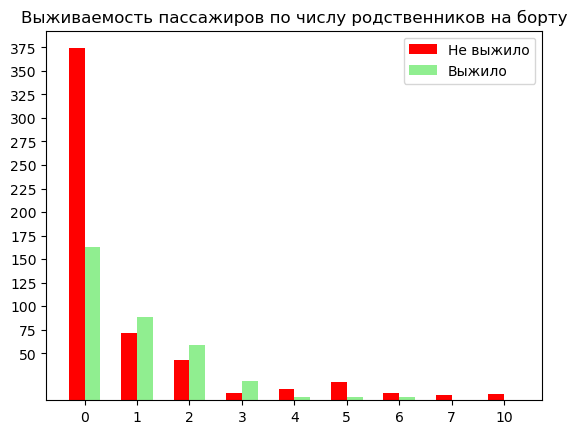

In [709]:
cat_par = sorted(titanic.family_members.unique())

zero = titanic.survived.groupby(titanic.family_members).count() - titanic.survived.groupby(titanic.family_members).sum()
one = titanic.survived.groupby(titanic.family_members).sum()

width = 0.3

x = np.arange(len(cat_par))
y = [x for x in range(50, 400, 25)]
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, zero, width, label='Не выжило', color = 'red')
rects2 = ax.bar(x + width/2, one, width, label='Выжило', color = 'lightgreen')

ax.set_title('Выживаемость пассажиров по числу родственников на борту')
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(cat_par)
ax.legend()

In [909]:
import pandas as pd
import seaborn as sns
from scipy import stats
def chi2_test(feature):
    contingency_table = pd.crosstab(titanic['survived'], titanic[feature])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Тест хи-квадрат для {feature}:")
    print(f"  p-значение: {p:.4f}")
    if p < 0.05:
        print("  Результат статистически значим")
    else:
        print("  Результат статистически не значим")
def mannwhitneyu_test(feature):
    survived = titanic[titanic['survived'] == 1][feature]
    not_survived = titanic[titanic['survived'] == 0][feature]
    u, p = stats.mannwhitneyu(survived, not_survived)
    print(f"U-критерий Манна-Уитни для {feature}:")
    print(f"  p-значение: {p:.4f}")
    if p < 0.05:
        print("  Результат статистически значим")
    else:
        print("  Результат статистически не значим")

titanic['age'].fillna(titanic['age'].mean(), inplace=True)

#categorical_features = ['family_members']
numerical_features = ['family_members']
#for feature in categorical_features:
  #  chi2_test(feature)

for feature in numerical_features:
    mannwhitneyu_test(feature)
titanic.family_members

U-критерий Манна-Уитни для family_members:
  p-значение: 0.0000
  Результат статистически значим


/var/folders/0m/j2nr6qtn7yx7cd4ch_1c5sg40000gn/T/ipykernel_5051/1168472958.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_members, Length: 891, dtype: int64

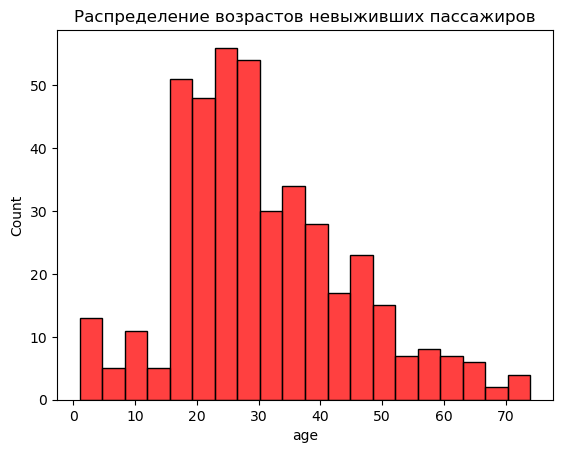

In [899]:
sns.histplot(data=age_didnt_survived, x='age', bins=20, color = 'red')
plt.title("Распределение возрастов невыживших пассажиров")
plt.show()

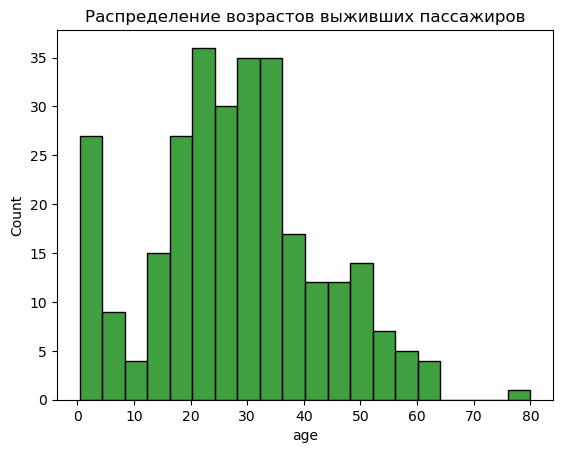

In [895]:
sns.histplot(data=age_survived, x='age', bins=20, color = 'green')
plt.title("Распределение возрастов выживших пассажиров")
plt.show()

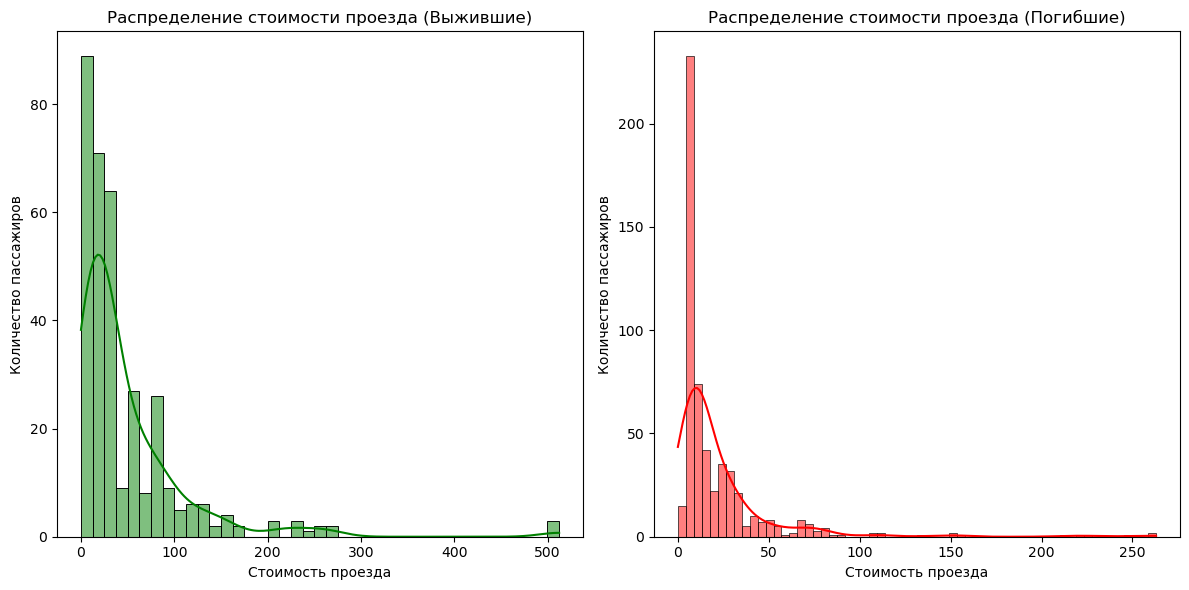

In [913]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Разделим график на две части
sns.histplot(titanic[titanic['survived'] == 1]['fare'], kde=True, label='Выжившие', color='green')
plt.title('Распределение стоимости проезда (Выжившие)')
plt.xlabel('Стоимость проезда')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 2, 2)
sns.histplot(titanic[titanic['survived'] == 0]['fare'], kde=True, label='Погибшие', color='red')
plt.title('Распределение стоимости проезда (Погибшие)')
plt.xlabel('Стоимость проезда')
plt.ylabel('Количество пассажиров')

plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()

In [915]:
survived_fare = titanic[titanic['survived'] == 1]['fare']
not_survived_fare = titanic[titanic['survived'] == 0]['fare']

u, p = stats.mannwhitneyu(survived_fare, not_survived_fare, alternative='greater') # Проверяем, что выжившие в среднем платили БОЛЬШЕ
print("\nU-критерий Манна-Уитни:")
print(f"  p-значение: {p:.4f}")
if p < 0.05:
    print("  Разница в распределениях статистически значима")
else:
    print("  Разница в распределениях статистически не значима")


U-критерий Манна-Уитни:
  p-значение: 0.0000
  Разница в распределениях статистически значима
